Vietnam FDI Total Reserves
ベトナムの外貨準備

world bankの以下のウェブサイトからダウンロードした csvファイルの最初の４行の不要部分を消去する。
https://data.worldbank.org/country/vietnam?view=chart


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/API_IDN_DS2_en_csv_v2_5457279.csv", on_bad_lines = 'warn', encoding ='utf-8')

In [3]:
df.shape

(1478, 67)

In [4]:
df1 = df.drop(["Country Name", "Country Code", "Indicator Code"], axis = 1)

In [5]:
df1 = df1.set_index('Indicator Name')

In [6]:
df2 = df1.iloc[:, 40:]

In [7]:
df2.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Internally displaced persons, new displacement associated with conflict and violence (number of cases)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,...,3.000000e+03,8.000000e+02,1.500000e+02,3.500000e+02,2.800000e+03,4.500000e+03,2.300000e+04,4.600000e+03,2.700000e+04,NaN
"Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval",3.084577e+01,NaN,3.184080e+01,3.134328e+01,3.365385e+01,3.605769e+01,3.653846e+01,3.942308e+01,4.134615e+01,4.075829e+01,...,4.319249e+01,4.679803e+01,4.630542e+01,4.482759e+01,4.285714e+01,4.299517e+01,4.299517e+01,4.057971e+01,4.492754e+01,NaN
Travel services (% of commercial service exports),9.830063e+01,9.841461e+01,8.107166e+01,7.849194e+01,3.857172e+01,3.576878e+01,5.099764e+01,5.067012e+01,5.534322e+01,4.859913e+01,...,4.083123e+01,4.477008e+01,4.984451e+01,4.948332e+01,5.327123e+01,5.387354e+01,5.470876e+01,2.353857e+01,3.857381e+00,2.920281e+01
Commercial service exports (current US$),5.060709e+09,5.361454e+09,6.519009e+09,5.143236e+09,1.243872e+10,1.264203e+10,8.721937e+09,1.055081e+10,1.333026e+10,1.151855e+10,...,2.233384e+10,2.291958e+10,2.158904e+10,2.264534e+10,2.466505e+10,3.048954e+10,3.091049e+10,1.436736e+10,1.349990e+10,2.300639e+10


In [8]:
allindex=list(df2.index.tolist())
#allindex

In [9]:
indexlist = pd.DataFrame(allindex)
indexlist.to_csv('result/index_list.csv')

In [35]:
# make up a list of one word with capital letters. Please give the key_word to list up indicators with the word.
key_word = 'population g'
capitalized = key_word.capitalize()
key_words_list = [key_word, capitalized]

In [36]:
possible_index = []
for i in indexlist[0]:
    for j in key_words_list:
        if j in i:
            possible_index.append(i)
        

In [37]:
possible_index

['Urban population growth (annual %)',
 'Population, female (% of total population)',
 'Population, female (% of total population)',
 'Age dependency ratio (% of working-age population)',
 'Population ages 75-79, male (% of male population)',
 'Population ages 75-79, male (% of male population)',
 'Population ages 65 and above (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population ages 65 and above, female (% of female population)',
 'Population ages 65 and above, female (% of female population)',
 'Population ages 60-64, male (% of male population)',
 'Population ages 60-64, male (% of male population)',
 'Population ages 50-54, male (% of male population)',
 'Population ages 50-54, male (% of male population)',
 'Population ages 40-44, male (% of male population)',
 'Population ages 40-44, male (% of male population)',
 'Population ages 30-34, male (% of male population)',
 'Population ages 30-34, male (% of male population)',
 'Population age

In [31]:
df3 = df2.loc[possible_index]
df4 = df3.dropna(thresh=11)

In [32]:
df4 = df4.astype(float)
#df4.iloc[0]

In [33]:
item_numbers = len(df4)

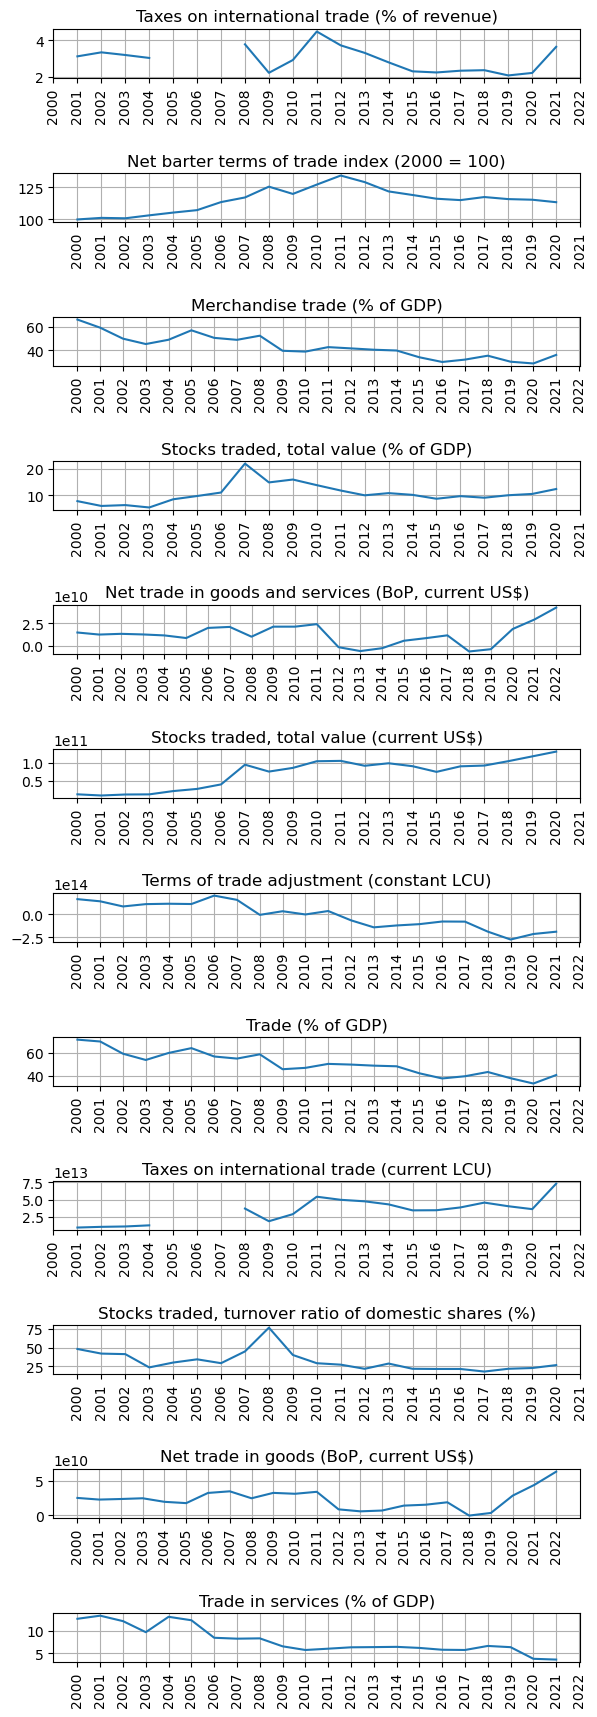

In [34]:
fig, ax = plt.subplots(item_numbers, figsize=(6, 18 ))

for i in range(item_numbers):
    ax[i].plot(df4.iloc[i])
    ax[i].set_title (df4.index[i])
    ax[i].tick_params(axis='x', labelrotation=90)
    ax[i].grid()
fig.tight_layout(rect=[0,0,1,0.96])    
plt.savefig("result/" + key_word + ".jpg")
